# Centralni granični teorem

In [1]:
import numpy as np; from numpy import *
import numpy.random as rnd;
import matplotlib.pyplot as plt
import ipywidgets as widgets; from ipywidgets import *

In [2]:
def clt(N1):
    N = 100000 # Veličina populacije
    #N1 = 2 # Veličina slučajnog uzorka
    rv_x = rnd.uniform(size=N) # Populacija

    N_uzoraka = int(N / N1)

    # Niz koji će sadržavati srednje vrijednosti svakog uzorka
    means = empty(N_uzoraka);
    rv_mean = rv_x.mean()

    rnd_pop = rnd.choice(range(N), N, replace=False)

    for i in range(N_uzoraka):
        means[i] = rv_x[rnd_pop[i*N1:min((i+1)*N1, N)]].mean()

    print(rv_mean, means.mean())

    plt.hist(rv_x, bins=40, density=True, label='X')
    plt.hist(means, bins=40, density=True, label='Means')
    plt.plot([rv_mean, rv_mean], array(plt.ylim()))
    plt.legend()
    plt.show()
interact(clt, N1=IntSlider(10, min=1, max=100));

interactive(children=(IntSlider(value=10, description='N1', min=1), Output()), _dom_classes=('widget-interact'…

In [3]:
interact(clt, N1=IntSlider(min=1000, max=10000));

interactive(children=(IntSlider(value=1000, description='N1', max=10000, min=1000), Output()), _dom_classes=('…

In [4]:
## Osobina konvolucije (TODO name)

In [42]:
"""TODO doc"""
def konvolucija(N, tip='rect'):
    # TODO N je Broj konvolucija signala sa samim sobom
    
    # Generisanje signala
    if tip == 'rect':
        x = pad(ones(50), (25,25))
    elif tip == 'noisy_rect':
        x = pad(rnd.uniform(0,1,50), (25,25))
    elif tip == 'exp':
        x = pad(exp(-0.1*array(range(50))), (25,25))

    # Prikaz ulazne sekvence
    plt.subplot(2,1,1)
    plt.plot(x)
    
    # Sekvenca se konvoluira sa samom sobom N puta
    y = x
    for i in range(N):
        y = convolve(y, x)
        
    # Normalizacija konvolucije
    y = y / sum(y)
    
    # Određivanje parametara aproksimacije
    n = array(range(len(y)))
    mi = sum(n * y)
    sigma = sqrt(sum((n-mi)**2 * y))
    
    approx = exp(-((n-mi) / sigma)**2 / 2) / (sigma * sqrt(2*pi))

    plt.subplot(2,1,2)
    plt.plot(y, label='Konvolucija');
    plt.plot(approx, label='Aproksimacija')
    plt.legend(); plt.show()
    
interact(konvolucija, N=IntSlider(1, min=1, max=8),
         tip=['rect', 'noisy_rect', 'exp']);

interactive(children=(IntSlider(value=1, description='N', max=8, min=1), Dropdown(description='tip', options=(…

## Obojeno uzorkovanje

In [36]:
"""
Izvlačenje uzoraka iz populacije i grafički prikaz.
N - Veličina populacije
N1 - Veličina uzorka
"""
def uzorkovanje(N1, N=1e4, oboji=True, randomiziraj=True, pojedinacni_pdf=True, pdf=False):

    Ng = int(N / N1) # Broj uzoraka
    N = Ng * N1 # Radi jednostavnosti se N stavlja da bude djeljivo sa N1
    x = rnd.rayleigh(0.3, size=N) # Generisanje populacije

    if not randomiziraj:
        x = sort(x)
        
    # Formiranje uzoraka
    uzorci = x.reshape(Ng, N1)
    
    plt.figure()
    
    # Crtanje populacije (različitim bojama ili sve u istoj boji)
    plt.subplot(3,1,1)
    if oboji:
        for i in range(Ng):
            plt.scatter(range(N1), uzorci[i])
    else:
        plt.scatter(range(N), x)

    i = 2 # indeks subplot-a [*] 

    if pojedinacni_pdf:
        plt.subplot(3,1,2)
        i = i + 1 # [*] koristi se ovdje
        if oboji:
            plt.hist(transpose(uzorci), stacked=True, density=True)
        else:
            plt.hist(x, bins=30)
        
    # Crtanje srednjih vrijednosti uzoraka
    if pdf:
        plt.subplot(3,1,i) # [*] koristi se ovdje
        plt.hist(mean(uzorci, axis=1), bins=40, density=True)
        Ex = x.mean() # Očekivana vrijednost od x
        plt.plot([Ex, Ex], list(plt.ylim()), label='Sr.vr. populacije')
        Eu = uzorci.mean() # Srednja vrijednost očekivanih vrijednosti populacije
        plt.plot([Eu, Eu], list(plt.ylim()), label='Sr.vr. oč. vrijednosti uzoraka')
        plt.legend()
        
    plt.show()
    

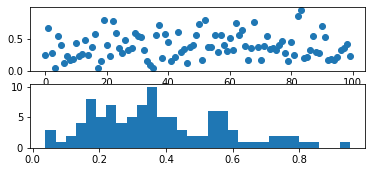

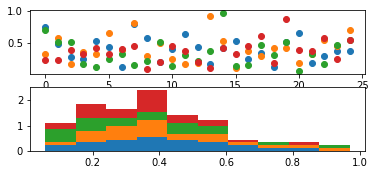

In [37]:
uzorkovanje(25, 100, oboji=False)
uzorkovanje(25, 100)

In [40]:
interact(uzorkovanje,
         N1=IntSlider(20, 1,1000),
         N=IntSlider(10000, 1,1e5),
         oboji=fixed(False),
         randomiziraj=True,
         pojedinacni_pdf=fixed(False),
         pdf=fixed(True)
        );

interactive(children=(IntSlider(value=20, description='N1', max=1000, min=1), IntSlider(value=10000, descripti…